In [5]:
import matplotlib.pyplot as plt
import pickle

In [50]:
dims = 1
tau = .04
lambd = .08
gamma = .1

# $\lambda$  & $\gamma$ & $\tau$ & $RMSE$ & $\Delta RMSE$ \\

# $K = 1$    & 0.08  & 0.1   & 0.04   & 0.8837  & 0.0235   \\
# $K = 2$    & 0.04  & 0.1   & 0.04   & 0.8765  & 0.0354 \\
# $K = 3$    & 0.02  & 0.4   & 0.03   & 0.8753  & 0.0380  \\               

In [51]:
path = "../dumps/10m/"
model_a_name = "k_2_history_model_A.pkl"
model_b_name = "k_2_history_model_B.pkl"
model_c_name = "k_2_history_model_C.pkl"

In [52]:
def load_history(model_name):
    file = open(path + model_name, 'rb')
    data = pickle.load(file)
    file.close()
    return data

In [53]:
history_model_a = load_history(model_a_name)
history_model_b = load_history(model_b_name)
history_model_c = load_history(model_c_name)

In [54]:
def get_plot_parameters_str() -> str:
    return '\n'.join((
        r'$K=%d$' % (dims,),
        r'$\tau=%.2f$' % (tau,),
        r'$\lambda=%.2f$' % (lambd,),
        r'$\gamma=%.2f$' % (gamma,)
    ))

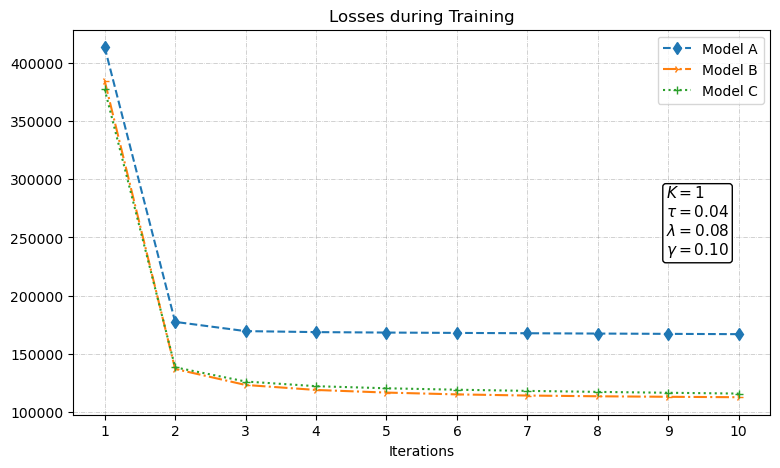

In [55]:
def plot_losses(save: bool = True) -> None:
    fig, ax = plt.subplots(figsize=(9, 5))
    x = range(1, len(history_model_a["training_losses"]) + 1)
    losses_model_a = [-k for k in history_model_a["training_losses"]]
    losses_model_b = [-k for k in history_model_b["training_losses"]]
    losses_model_c = [-k for k in history_model_c["training_losses"]]
    ax.plot(x, losses_model_a, marker="d", linestyle="--", label = "Model A")
    ax.plot(x, losses_model_b, marker="4", linestyle="-.", label = "Model B")
    ax.plot(x, losses_model_c, marker="+", linestyle=":", label = "Model C")
    ax.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
    ax.set_xlabel("Iterations")
    ax.set_title("Losses during Training")
    ax.set_xticks(x)
    ax.legend()
    ax.text(0.85, 0.5, get_plot_parameters_str(), transform=ax.transAxes, fontsize=11,
            horizontalalignment="left", verticalalignment="center",
            bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2),
            )
    if save:
        plt.savefig(
            f'{path}/all_losses_l_{lambd}_g_{gamma}_t_{tau}_K_{dims}.pdf'
        )

plot_losses(save=True)

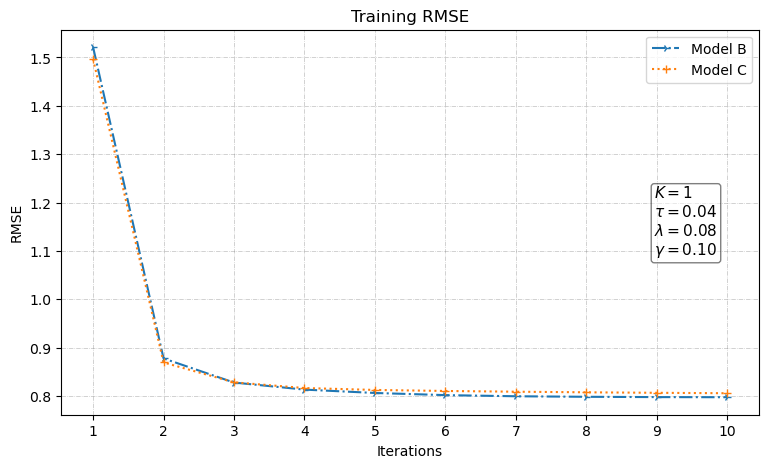

In [58]:
def plot_training_rmse(save: bool = False) -> None:
    fig, ax = plt.subplots(figsize=(9, 5))
    x = range(1, len(history_model_a["training_losses"]) + 1)
    training_rmse_model_a = history_model_a["training_rmse"]
    training_rmse_model_b = history_model_b["training_rmse"]
    training_rmse_model_c = history_model_c["training_rmse"]
    # ax.plot(x, training_rmse_model_a, marker="d", linestyle="--", label = "Model A")
    ax.plot(x, training_rmse_model_b, marker="4", linestyle="-.", label = "Model B")
    ax.plot(x, training_rmse_model_c, marker="+", linestyle=":", label = "Model C")
    ax.legend(loc='upper right')
    ax.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
    ax.set_title("Training RMSE")
    ax.set_ylabel("RMSE")
    ax.set_xlabel("Iterations")
    ax.set_xticks(x)
    ax.text(0.85, 0.5, get_plot_parameters_str(), transform=ax.transAxes, fontsize=11,
            horizontalalignment="left", verticalalignment="center",
            bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2, alpha=0.5),
    )
    if save:
        plt.savefig(f'{path}/all_training_costs_l_{lambd}_g_{gamma}_t_{tau}_K_{dims}.pdf')


plot_training_rmse(save=True)

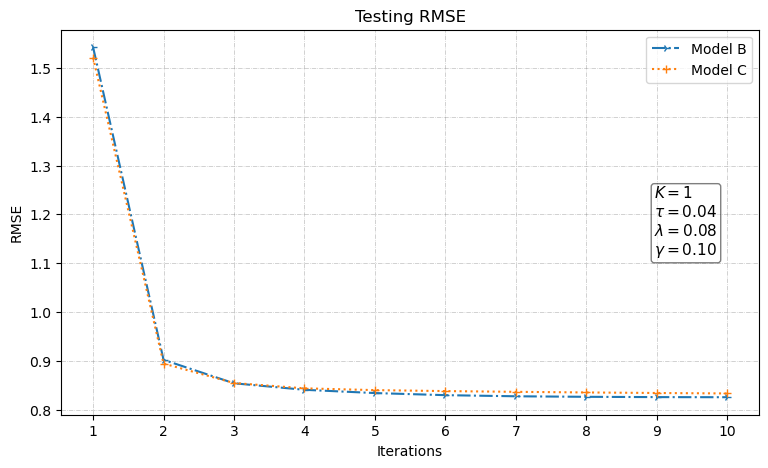

In [57]:
def plot_testing_rmse(save: bool = False) -> None:
    fig, ax = plt.subplots(figsize=(9, 5))
    x = range(1, len(history_model_a["training_losses"]) + 1)
    testing_rmse_model_a = history_model_a["testing_rmse"]
    testing_rmse_model_b = history_model_b["testing_rmse"]
    testing_rmse_model_c = history_model_c["testing_rmse"]
    #ax.plot(x, testing_rmse_model_a, marker="d", linestyle="--", label = "Model A")
    ax.plot(x, testing_rmse_model_b, marker="4", linestyle="-.", label = "Model B")
    ax.plot(x, testing_rmse_model_c, marker="+", linestyle=":", label = "Model C")
    ax.legend(loc='upper right')
    ax.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)
    ax.set_title("Testing RMSE")
    ax.set_ylabel("RMSE")
    ax.set_xlabel("Iterations")
    ax.set_xticks(x)
    ax.text(0.85, 0.5, get_plot_parameters_str(), transform=ax.transAxes, fontsize=11,
            horizontalalignment="left", verticalalignment="center",
            bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2, alpha=0.5),
    )
    if save:
        plt.savefig(f'{path}/all_testing_costs_l_{lambd}_g_{gamma}_t_{tau}_K_{dims}.pdf')


plot_testing_rmse(save=True)

In [21]:
history_model_a["testing_rmse"][-1] - history_model_a["training_rmse"][-1]

0.03793557632344324

In [22]:
history_model_a["testing_rmse"][-1]

5.140668486409907

In [23]:
history_model_b["testing_rmse"][-1] - history_model_b["training_rmse"][-1]

0.03238403531691458

In [24]:
history_model_b["testing_rmse"][-1]

0.8298686707889074

In [25]:
history_model_c["testing_rmse"][-1]

0.8227025118437857

In [26]:
history_model_c["testing_rmse"][-1] - history_model_c["training_rmse"][-1]

0.031499795784573514